In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
# import some data to play with
company = pd.read_csv("C://data science//data sets//Company_Data.csv")

In [4]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:

label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])

In [6]:
x=company.iloc[:,0:4]
y=company['ShelveLoc']

In [7]:
x

,Sales,CompPrice,Income,Advertising
0,9.50,138,73,11
1,11.22,111,48,16
2,10.06,113,35,10
3,7.40,117,100,4
4,4.15,141,64,3
...,...,...,...,...
395,12.57,138,108,17
396,6.14,139,23,3
397,7.41,162,26,12
398,5.94,100,79,7


In [8]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [9]:
company["ShelveLoc"].unique()

array([0, 1, 2])

In [10]:
company.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [11]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [12]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [13]:
#Building Decision Tree Classifier using Entropy Criteria
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

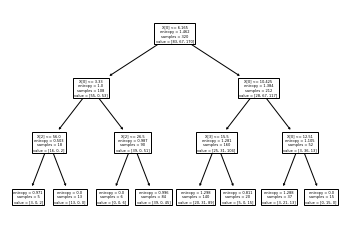

In [14]:
#PLot the decision tree
tree.plot_tree(model);

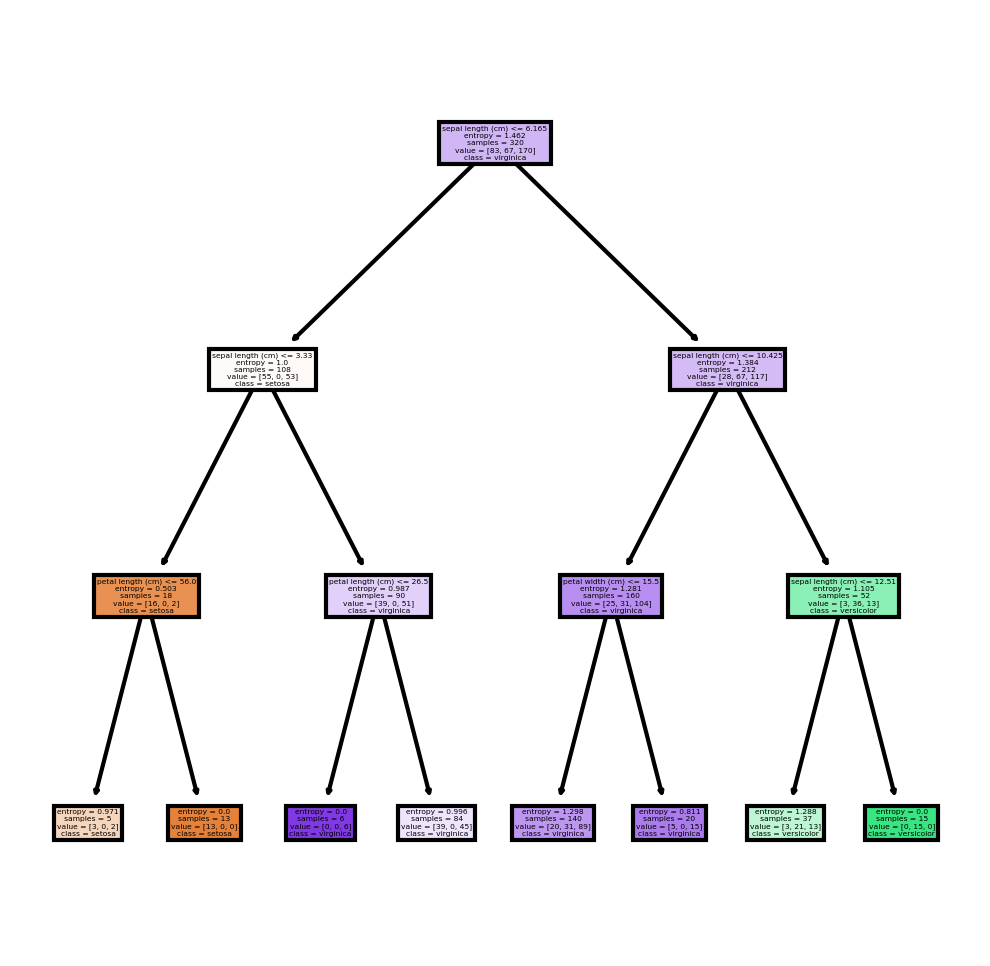

In [15]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [16]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

2    63
1    13
0     4
dtype: int64

In [17]:
preds


array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [18]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [19]:
# Accuracy 
np.mean(preds==y_test)

0.625

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [21]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.625

In [23]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [24]:
array = company.values
X = array[:,0:3]
y = array[:,3]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [26]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
#Find the accuracy
model.score(X_test,y_test)

-1.2831076744399281